In [7]:
#!pip install pandas 
#!pip install matplotlib
#!pip install plotly
#!pip install seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [4]:
df = pd.read_csv('homicide_by_countries.csv')
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [9]:
df.shape

(195, 6)

In [10]:
df.isnull().sum()
#df.dropna(subset = ['Subregion'], inplace = true)

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [11]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [12]:
df['Rate'] = df['Rate'].astype(int)

In [13]:
df.dtypes

Location     object
Region       object
Subregion    object
Rate          int64
Count         int64
Year          int64
dtype: object

In [11]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [10]:
df1 = df.sort_values('Count', ascending = False).reset_index(drop = True)
df1

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,Americas,South America,22.5,47722,2020
1,Nigeria,Africa,Western Africa,22.0,44200,2019
2,India,Asia,Southern Asia,3.0,40651,2020
3,Mexico,Americas,Central America,28.4,36579,2020
4,United States,Americas,Northern America,6.5,21570,2020
...,...,...,...,...,...,...
190,Holy See,Europe,Southern Europe,0.0,0,2015
191,Monaco,Europe,Western Europe,0.0,0,2015
192,Isle of Man,Europe,Northern Europe,0.0,0,2016
193,San Marino,Europe,Southern Europe,0.0,0,2011


In [15]:
df1 = df[['Location', 'Count']].sort_values(by = 'Count', ascending = False).head(5)
df1 

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


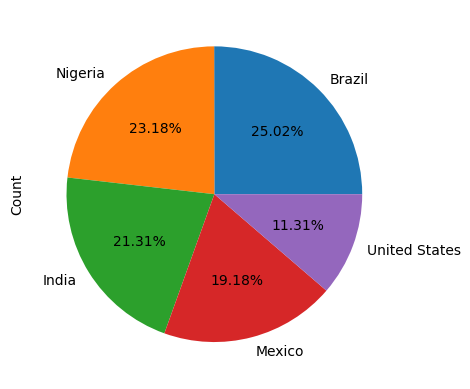

In [18]:
df1.plot( x = 'Location', y = 'Count', kind = 'pie', labels = df1.Location, autopct = '%1.2f%%')
plt.legend().set_visible(False)

In [20]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
df2

Region
Americas    153597
Asia        105552
Africa       99481
Europe       19869
Oceania        347
Name: Count, dtype: int64

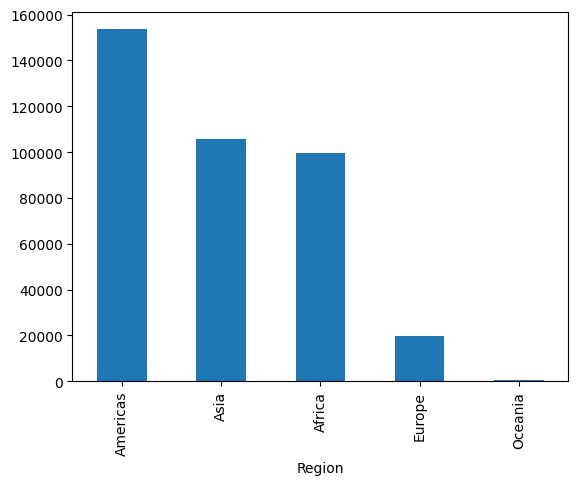

In [22]:
df2.plot(kind = 'bar')
plt.show()

In [23]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending = False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

In [24]:
df3.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [25]:
df3.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347])

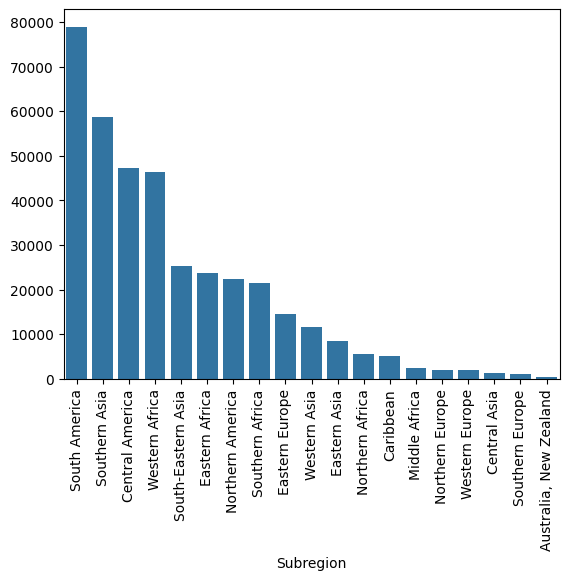

In [32]:
sns.barplot(x = df3.index, y = df3.values)
plt.xticks(rotation = 'vertical')
plt.show()

In [33]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [34]:
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2011     5
2013     5
2014     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [38]:
df[df['Region'].isin(['Asia', 'Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
8,Armenia,Asia,Western Asia,1.8,52,2020
11,Austria,Europe,Western Europe,0.7,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0.7,64,2019
184,United Kingdom,Europe,Northern Europe,1.1,755,2018
189,Uzbekistan,Asia,Central Asia,1.2,396,2019
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011


In [46]:
df4 = df[(df['Region'] == 'Asia') | (df['Region'] == 'Europe')]

In [49]:
df4 = df4[df4['Year']> 2016][['Region', 'Year', 'Count']]

In [50]:
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [56]:
df4 = df4.groupby(['Region', 'Year']).sum()['Count']
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [60]:
df_unstacked = df4.unstack(level = 0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [74]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)

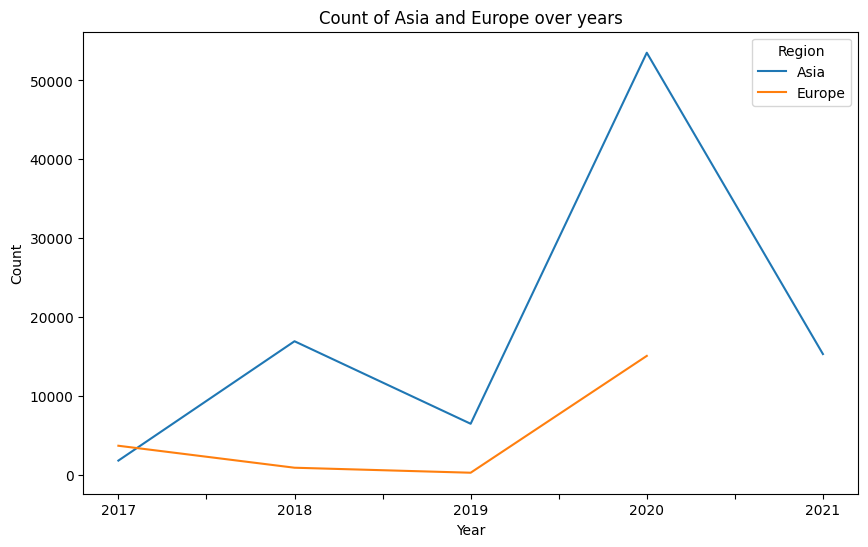

In [77]:
df_unstacked.plot(kind = 'line', figsize = (10,6)) 
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Asia and Europe over years')
plt.show()

In [78]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [80]:
df5 = df.groupby(['Year'])['Rate'].sum().sort_values(ascending = False)
df5

Year
2020    608.0
2019    161.0
2012    119.5
2016     78.8
2018     70.0
2015     58.5
2014     54.2
2009     39.5
2017     30.3
2021     28.4
2013     21.7
2007     19.0
2010     18.2
2006     12.5
2011     10.1
2008      5.1
Name: Rate, dtype: float64

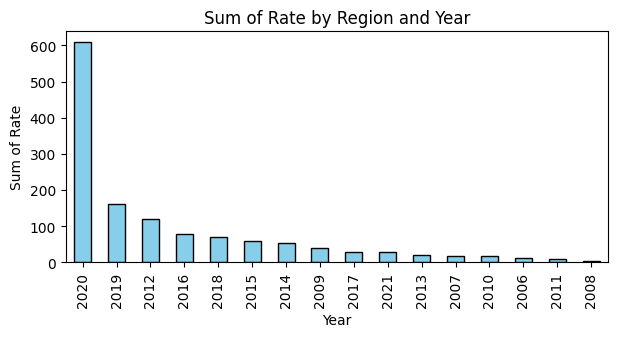

In [90]:
df5.plot(kind = 'bar', figsize = (7, 3), color = 'skyblue', edgecolor = 'black')
plt.xlabel('Year')
plt.ylabel('Sum of Rate')
plt.title('Sum of Rate by Region and Year')
plt.show()

In [91]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [97]:
df6 = df[['Year', 'Region', 'Count']]
df6 = df6.groupby(['Year', 'Region']).sum().sort_values(by = 'Year', ascending = False).head(40)
df6

Count
Year Region          
2021 Asia       15299
2020 Oceania      221
     Europe     15066
     Americas  134784
     Africa     28460
     Asia       53516
2019 Asia        6458
     Americas    4276
     Africa     44210
     Europe       249
     Oceania      126
2018 Americas   13793
     Asia       16923
     Europe       883
2017 Asia        1787
     Africa      1467
     Europe      3670
2016 Europe         0
     Americas     608
     Asia         627
     Africa      4987
2015 Asia         241
     Africa      2206
     Europe         0
2014 Americas      13
     Asia        3029
2013 Asia        5782
2012 Africa     15264
     Americas      53
     Asia          61
2011 Africa       855
     Asia        1626
     Europe         0
2010 Africa       303
     Europe         1
2009 Africa        27
     Americas      42
2008 Africa      1702
2007 Americas      26
2006 Asia         203

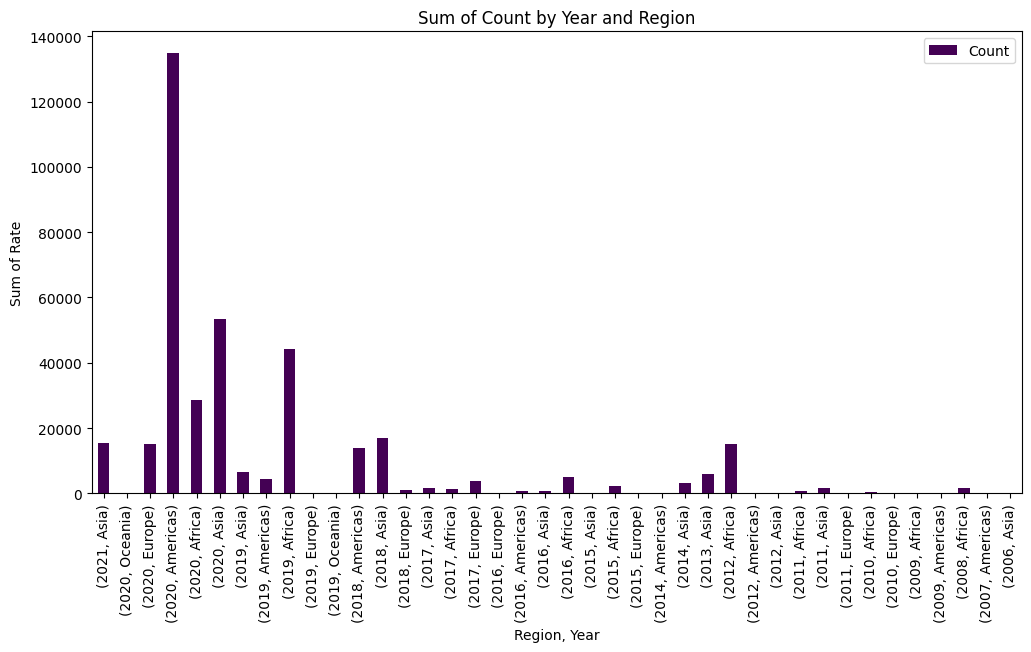

In [99]:
df6.plot(kind = 'bar', figsize = (12, 6), colormap = 'viridis')
plt.xlabel('Region, Year')
plt.ylabel('Sum of Rate')
plt.title('Sum of Count by Year and Region')
plt.show()